In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## Prepare the data 

In [4]:
# generate some random data
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=50,
    n_features=2,
    centers=2,
    random_state=42,
    cluster_std=0.9)

print(X.shape, y.shape)
print(X[:5])
print(y[:5])
print(np.unique(y))

(50, 2) (50,)
[[ 4.6076354   3.38134897]
 [-3.05073357 10.68133649]
 [-3.70456507  9.19146124]
 [-2.44842224  7.73201276]
 [-3.42074563  9.29710873]]
[1 0 0 0 0]
[0 1]


## Visualize the data

In [5]:
def plot_data_set(X,y):
    classes = np.unique(y)
    for c in classes:
        X_new = X[y==c]
        plt.scatter(X_new[:, 0], X_new[:, 1],
                    edgecolors='gray',
                    label = classes[c],
                    cmap=plt.cm.coolwarm, alpha=0.7
        )

        plt.xlabel('X[0]')
        plt.ylabel('X[1]')
        plt.legend(loc='best')


In [6]:
def plt_random_set_lines():
    # draw three different line separators
    x_values = np.linspace(-3, 2, num=3)

    # line: a*x + b
    a = [2, 3, 4.8]
    b = [4, 5, 5]
    l_colors = ['red', 'green', 'blue']

    for a, b, c in zip(a,b,l_colors):
        plt.plot(x_values, a * x_values + b, color=c)


/tmp/ipykernel_8545/1350554518.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_new[:, 0], X_new[:, 1],


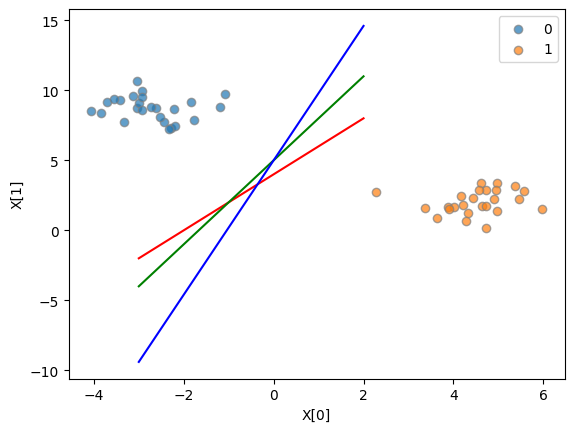

In [7]:
plt.figure(dpi=100)
plot_data_set(X,y)
plt_random_set_lines()
# plt.show()

# Which is the best line?

## Choose the model

In [8]:
clf = svm.SVC(kernel="linear", C=0.05)

## Train

In [9]:
clf.fit(X, y)

SVC(C=0.05, kernel='linear')

### inspect the model

In [10]:
# get support vectors
sv = clf.support_vectors_
print(sv)

[[-2.32122039  7.25058302]
 [ 2.28210824  2.71288194]]


/tmp/ipykernel_8545/1350554518.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_new[:, 0], X_new[:, 1],


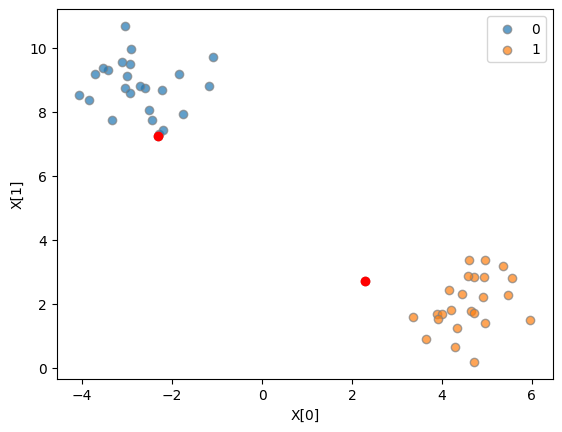

In [11]:
plot_data_set(X,y)
plt.scatter(sv[:,0], sv[:,1],c="red")

In [12]:
def plot_margins(clf, figure_title = 'Figure 1'):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    # fig, ax = plt.subplots()  #create figure and axes
    plt.figure(1, figsize=(8, 5))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], zorder=10, cmap=plt.cm.Paired, edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -15
    y_max = 15

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Pastel1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())

    ax = plt.gca()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(figure_title)

    plt.legend(['boundary', 'margin = {:.2f}'.format(margin)],
               bbox_to_anchor=(1,1),
               loc="upper left")

plt.show()

/tmp/ipykernel_8545/966124616.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], zorder=10, cmap=plt.cm.Paired, edgecolors='k')


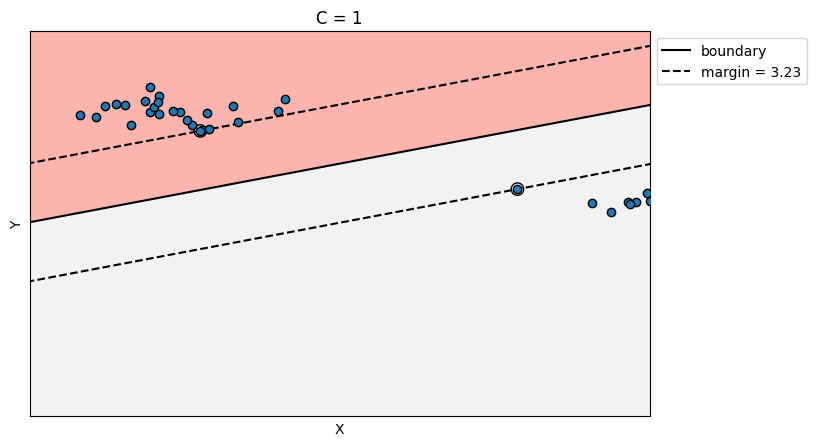

/tmp/ipykernel_8545/966124616.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], zorder=10, cmap=plt.cm.Paired, edgecolors='k')


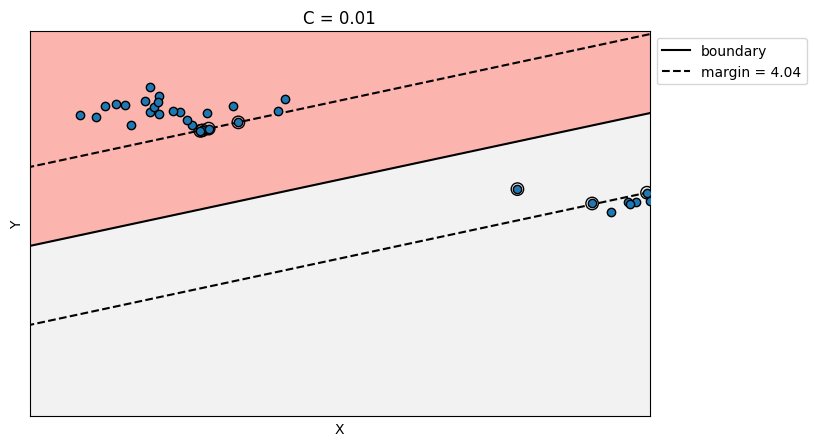

In [13]:
# plot margins on different penality values
for penalty in [1, 0.01]:
    # fit the model with each penality value:
    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, y)

    plot_margins(clf, f'C = {penalty}')

    plt.show()

<Axes: >

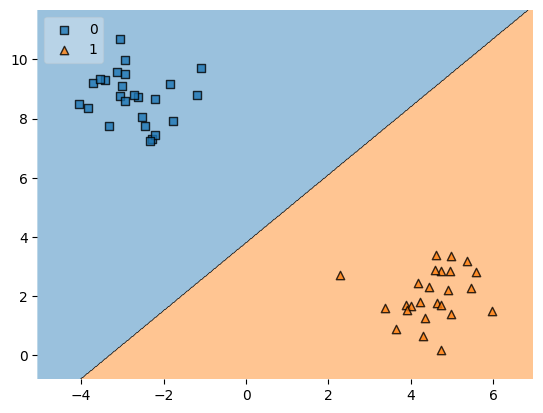

In [15]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,
                      y,
                      clf=clf,
                      legend=2)
# plt.scatter(-2,1.5, c="red")

## Predict

In [47]:
X_test = [[-2,1], [-2,1.5], [-2,2]]
y_test = [1,1,0]

y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0])

## Evaluating the Model

In [48]:
from sklearn import metrics

In [49]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [50]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 1.0


In [51]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 1.0
